<a href="https://colab.research.google.com/github/mifm/examples/blob/master/IEA37_Random_Search_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
%%capture
!pip install git+https://gitlab.windenergy.dtu.dk/TOPFARM/TopFarm2.git

In [11]:
from py_wake.examples.data.iea37._iea37 import IEA37_WindTurbines, IEA37Site
from topfarm._topfarm import TopFarmProblem
from topfarm.constraint_components.boundary import CircleBoundaryConstraint
from topfarm.plotting import XYPlotComp
from topfarm.easy_drivers import EasyRandomSearchDriver
from topfarm.drivers.random_search_driver import RandomizeTurbinePosition_Circle
from topfarm.cost_models.py_wake_wrapper import PyWakeAEPCostModelComponent
from py_wake.deficit_models.gaussian import IEA37SimpleBastankhahGaussian
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def opt(n_wt):
  site = IEA37Site(n_wt)
  windTurbines = IEA37_WindTurbines()
  windFarmModel = IEA37SimpleBastankhahGaussian(site, windTurbines)
  tf = TopFarmProblem(
      design_vars=dict(zip('xy', site.initial_position.T)),
      cost_comp=PyWakeAEPCostModelComponent(windFarmModel, n_wt),
      driver=EasyRandomSearchDriver(randomize_func=RandomizeTurbinePosition_Circle(), max_iter=50),
      constraints=[CircleBoundaryConstraint([0, 0],  site.initial_position.max() * 1.5)],
      plot_comp=XYPlotComp())
  cost, state, recorder = tf.optimize()
  tf.plot_comp.show()
  return cost, state, recorder

Exception ignored in: <_io.FileIO name='/content/openmdao_checks.out' mode='wb' closefd=True>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/openmdao/utils/logger_utils.py", line 81, in get_logger
    for handler in logger.handlers:
Exception ignored in: <_io.FileIO name='/content/openmdao_checks.out' mode='wb' closefd=True>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/openmdao/core/problem.py", line 2276, in check_config
    logger = get_logger('check_config', out_file=out_file, use_format=True)


INFO: checking out_of_order


INFO:check_config:checking out_of_order


INFO: checking system


INFO:check_config:checking system


INFO: checking solvers


INFO:check_config:checking solvers


INFO: checking dup_inputs


INFO:check_config:checking dup_inputs


INFO: checking missing_recorders


INFO:check_config:checking missing_recorders


INFO: checking unserializable_options


INFO:check_config:checking unserializable_options


INFO: checking comp_has_no_outputs


INFO:check_config:checking comp_has_no_outputs


INFO: checking auto_ivc_warnings


INFO:check_config:checking auto_ivc_warnings


INFO: checking out_of_order


INFO:check_config:checking out_of_order


INFO: checking system


INFO:check_config:checking system


INFO: checking solvers


INFO:check_config:checking solvers


INFO: checking dup_inputs


INFO:check_config:checking dup_inputs


INFO: checking missing_recorders


INFO:check_config:checking missing_recorders


INFO: checking unserializable_options


INFO:check_config:checking unserializable_options


INFO: checking comp_has_no_outputs


INFO:check_config:checking comp_has_no_outputs


INFO: checking auto_ivc_warnings


INFO:check_config:checking auto_ivc_warnings


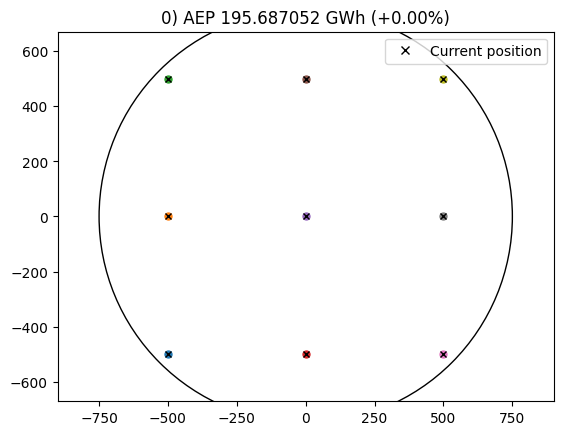

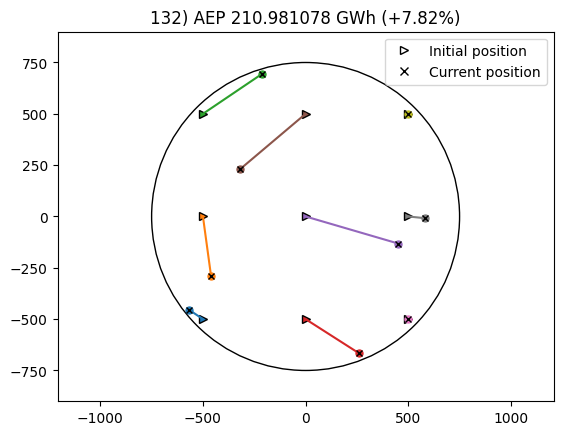

INFO: checking out_of_order


INFO:check_config:checking out_of_order


INFO: checking system


INFO:check_config:checking system


INFO: checking solvers


INFO:check_config:checking solvers


INFO: checking dup_inputs


INFO:check_config:checking dup_inputs


INFO: checking missing_recorders


INFO:check_config:checking missing_recorders


INFO: checking unserializable_options


INFO:check_config:checking unserializable_options


INFO: checking comp_has_no_outputs


INFO:check_config:checking comp_has_no_outputs


INFO: checking auto_ivc_warnings


INFO:check_config:checking auto_ivc_warnings


INFO: checking out_of_order


INFO:check_config:checking out_of_order


INFO: checking system


INFO:check_config:checking system


INFO: checking solvers


INFO:check_config:checking solvers


INFO: checking dup_inputs


INFO:check_config:checking dup_inputs


INFO: checking missing_recorders


INFO:check_config:checking missing_recorders


INFO: checking unserializable_options


INFO:check_config:checking unserializable_options


INFO: checking comp_has_no_outputs


INFO:check_config:checking comp_has_no_outputs


INFO: checking auto_ivc_warnings


INFO:check_config:checking auto_ivc_warnings


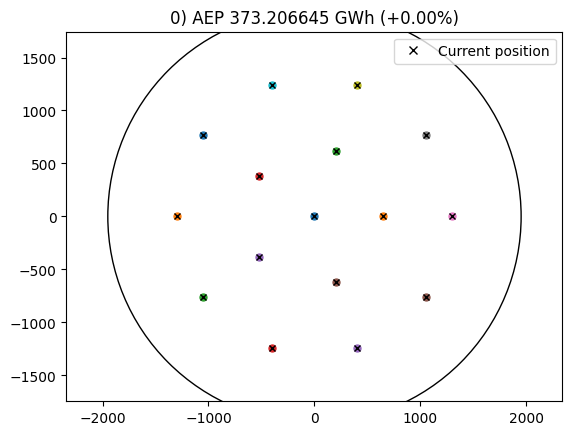

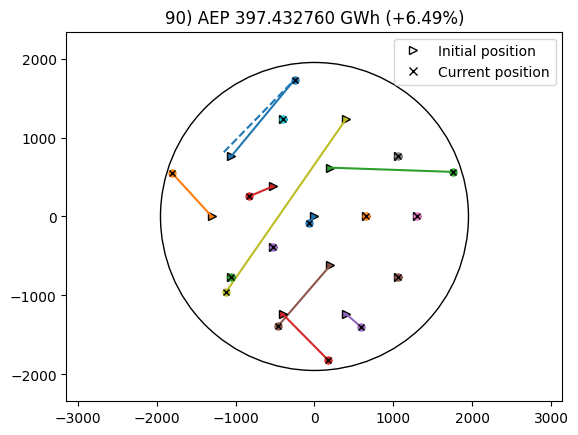

INFO: checking out_of_order


INFO:check_config:checking out_of_order


INFO: checking system


INFO:check_config:checking system


INFO: checking solvers


INFO:check_config:checking solvers


INFO: checking dup_inputs


INFO:check_config:checking dup_inputs


INFO: checking missing_recorders


INFO:check_config:checking missing_recorders


INFO: checking unserializable_options


INFO:check_config:checking unserializable_options


INFO: checking comp_has_no_outputs


INFO:check_config:checking comp_has_no_outputs


INFO: checking auto_ivc_warnings


INFO:check_config:checking auto_ivc_warnings


INFO: checking out_of_order


INFO:check_config:checking out_of_order


INFO: checking system


INFO:check_config:checking system


INFO: checking solvers


INFO:check_config:checking solvers


INFO: checking dup_inputs


INFO:check_config:checking dup_inputs


INFO: checking missing_recorders


INFO:check_config:checking missing_recorders


INFO: checking unserializable_options


INFO:check_config:checking unserializable_options


INFO: checking comp_has_no_outputs


INFO:check_config:checking comp_has_no_outputs


INFO: checking auto_ivc_warnings


INFO:check_config:checking auto_ivc_warnings


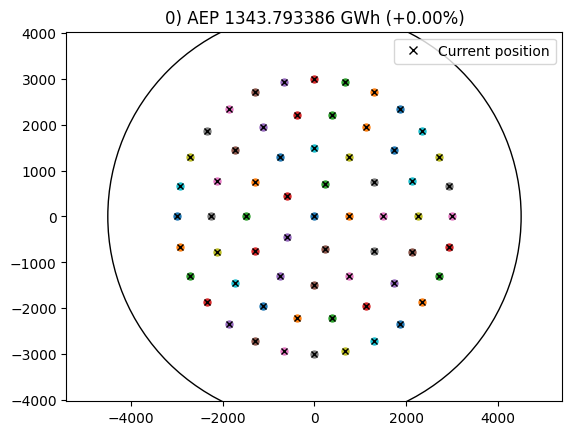

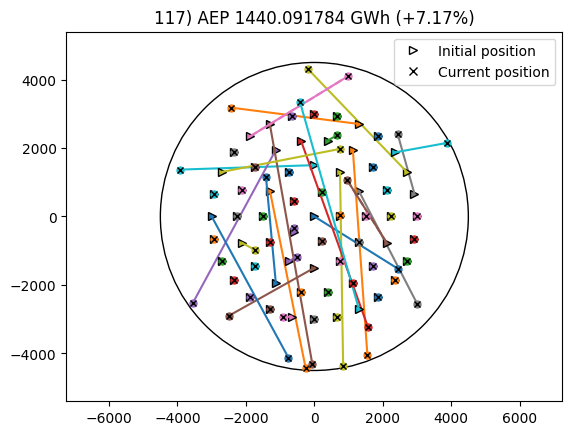

In [13]:
costs, states, recorders = [], [], []
n_wts = [9, 16, 64]
for n_wt in n_wts:
  cost, state, recorder = opt(n_wt)
  costs.append(cost)
  states.append(state)
  recorders.append(recorder)

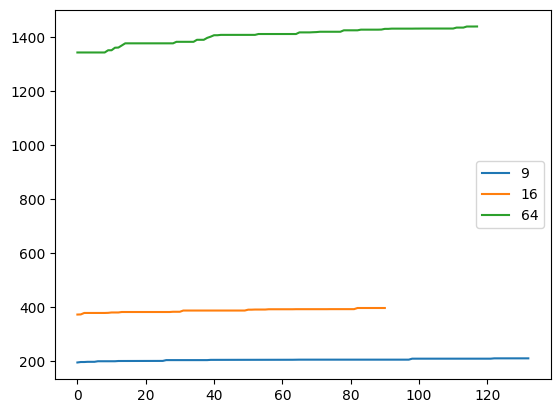

In [14]:
plt.figure()
for n_wt, recorder in zip(n_wts, recorders):
    plt.plot(recorder['AEP'], label=n_wt)
plt.legend()
